In [10]:
###### Getting inspiration from a plot from my own thesis:
## https://github.com/annacuomo/Anna_PhD_notebooks/blob/main/Thesis/sc_datasets.ipynb
#### which is itself inspired by: https://academic.oup.com/database/article/doi/10.1093/database/baaa073/6008692

In [54]:
library(ggplot2)

In [55]:
mydir = "/share/ScratchGeneral/anncuo/SingleCellEQTLs_Review/"

In [56]:
list.files(mydir)

[1] "single_cell_eqtl_studies.csv"

In [57]:
myfile = paste0(mydir,"single_cell_eqtl_studies.csv")
df = read.csv(myfile)

In [58]:
nrow(df)
head(df,2)

[1] 22

,Date,Shorthand,DOI,Reported.unique.individuals,Individuals.reported.ancestry,Reported.total.cells,Pseudobulk,Dynamic.eQTL,scRNA.seq.technique,eQTL.mapping.method,article.type,Authors,Journal,Single.cell.eQTL.analysis.of.activated.T.cell.subsets.reveals.activation.and.cell.type.dependent.effects.of.disease.risk.variants,bioRxiv.Date,Tissue,Organism,Notes,Title
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,08/06/2022,Daniszewski et al CellGenomics,10.1016/j.xgen.2022.100142,183,,"247,520",,,,,research article,,Cell Genomics,-,-,iPSC-derived retinal organoids,human,,Retinal ganglion cell-specific genetic regulation in primary open-angle glaucoma
2,07/06/2022,Oelen et al NatComm,10.1038/s41467-022-30893-5,120,EUR (NL),"1,300,000.00",Y,,,correlation,research article,"Roy Oelen, Dylan H. de Vries, Harm Brugge, Gracie Gordon, Martijn Vochteloo, BIOS Consortium, Chun J. Ye, Harm-Jan Westra, Lude Franke, Monique G.P. van der Wijst",Nature Communications,10.1101/2021.06.04.447088,06/06/2021,PBMCs,human,,"Single-cell RNA-sequencing of peripheral blood mononuclear cells reveals widespread, context-specific gene expression regulation upon pathogenic exposure"


In [59]:
df$Reported.total.cells

[1] "247,520"      "1,300,000.00" "655,349"      "500,000"      "489"         
 [6] "1,270,000.00" "1,260,000.00" "-"            "735,000"      "230,786"     
[11] "-"            "22,188"       "-"            "-"            "64,018"      
[16] "1,027,401"    "-"            "-"            "36,044"       "7,585"       
[21] "25,291"       ""

In [60]:
colnames(df)

[1] "Date"                                                                                                                             
 [2] "Shorthand"                                                                                                                        
 [3] "DOI"                                                                                                                              
 [4] "Reported.unique.individuals"                                                                                                      
 [5] "Individuals.reported.ancestry"                                                                                                    
 [6] "Reported.total.cells"                                                                                                             
 [7] "Pseudobulk"                                                                                                                       
 [8] "Dynamic.eQTL"                                                                                                                     
 [9] "scRNA.seq.technique"                                                                                                              
[10] "eQTL.mapping.method"                                                                                                              
[11] "article.type"                                                                                                                     
[12] "Authors"                                                                                                                          
[13] "Journal"                                                                                                                          
[14] "Single.cell.eQTL.analysis.of.activated.T.cell.subsets.reveals.activation.and.cell.type.dependent.effects.of.disease.risk.variants"
[15] "bioRxiv.Date"                                                                                                                     
[16] "Tissue"                                                                                                                           
[17] "Organism"                                                                                                                         
[18] "Notes"                                                                                                                            
[19] "Title"

In [61]:
sel_columns = c("Date","Reported.total.cells","Reported.unique.individuals","Shorthand")
df_sel = df[df$Shorthand != "Ma et al Gene",sel_columns]
df_sel$Reported.total.cells = gsub(",","",df_sel$Reported.total.cells)
df_sel$Date = gsub("/","",df_sel$Date)
tail(df_sel)

,Date,Reported.total.cells,Reported.unique.individuals,Shorthand
,<chr>,<chr>,<chr>,<chr>
17,30102020,-,-,Mandric et al NatComm
18,09032020,-,-,van der Wijst et al eLife
19,10022020,36044,125,Cuomo et al NatComm
20,19042019,7585,53,Sarkar et al PlosGenet
21,02042018,25291,45,van der Wijst et al NatGenet
22,11122017,,23,Kang et al NatBiotech


In [62]:
df_sel$Reported.total.cells

[1] "247520"     "1300000.00" "655349"     "500000"     "1270000.00"
 [6] "1260000.00" "-"          "735000"     "230786"     "-"         
[11] "22188"      "-"          "-"          "64018"      "1027401"   
[16] "-"          "-"          "36044"      "7585"       "25291"     
[21] ""

In [63]:
df_sel$Reported.unique.individuals = as.numeric(as.character(df_sel$Reported.unique.individuals))
df_sel$Reported.total.cells = as.numeric(as.character(df_sel$Reported.total.cells))
# df_sel = df_sel[!(is.na(df_sel$Reported.total.cells)),]
df_sel = df_sel[!(is.na(df_sel$Reported.unique.individuals)),]
df_sel$Date = as.Date(as.character(df_sel$Date), "%d%m%Y")

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [70]:
df_sel

,Date,Reported.total.cells,Reported.unique.individuals,Shorthand
,<date>,<dbl>,<dbl>,<chr>
1,2022-06-08,247520,183,Daniszewski et al CellGenomics
2,2022-06-07,1300000,120,Oelen et al NatComm
3,2022-05-26,655349,119,Soskic et al NatGenet
4,2022-05-11,500000,259,Nathan et al Nature
6,2022-04-08,1270000,982,Yazar et al Science
7,2022-04-08,1260000,264,Perez et al Science
9,2022-02-25,735000,89,Schmiedel et al SciImmun
10,2022-01-21,230786,19,Elorbany et al PlosGenet
12,2021-09-01,22188,68,Kumasaka et al bioRxiv


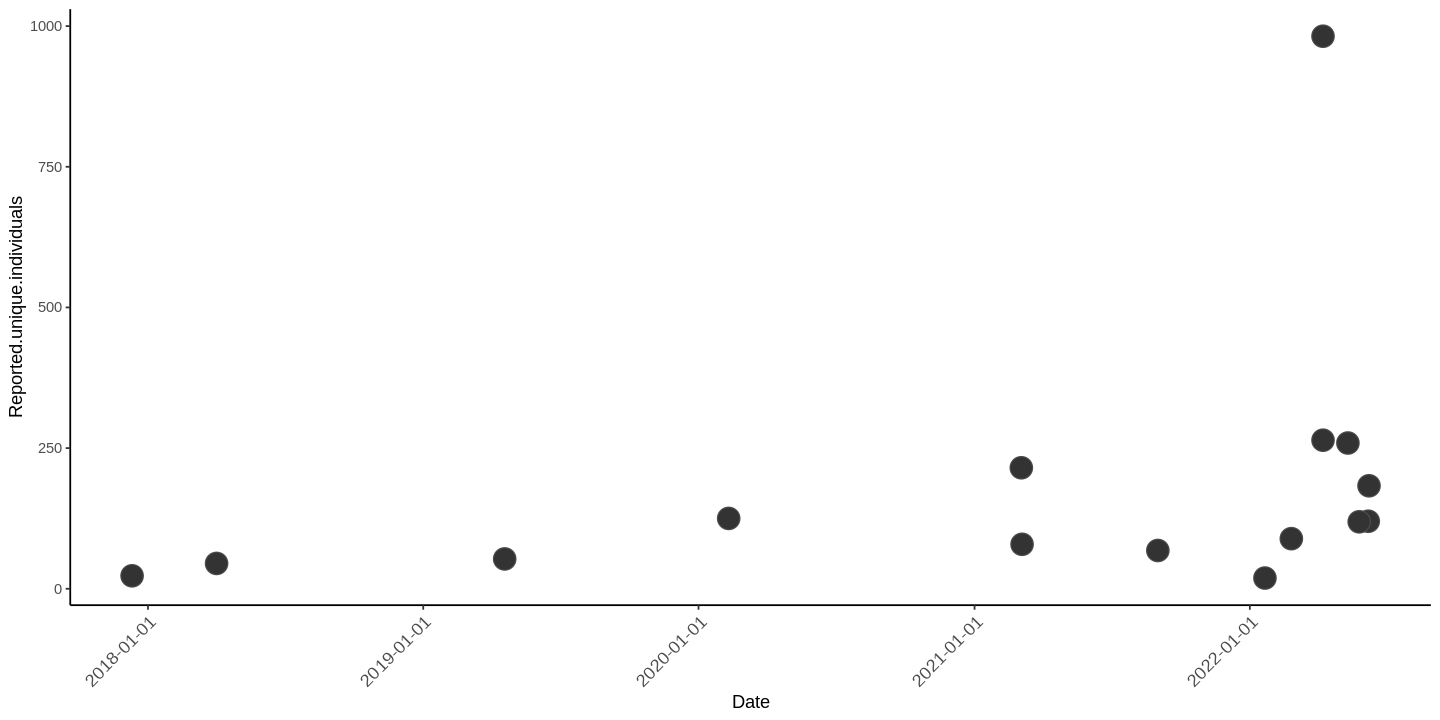

In [65]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(df_sel, aes(x = Date, y = Reported.unique.individuals)) + 
    geom_point(shape = 21, fill = "gray20", size = 6, col = "gray30") +
    scale_x_date(date_breaks="1 year") +
    theme_classic() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1, size = 11))

Warning message:
“Removed 1 rows containing missing values (geom_point).”


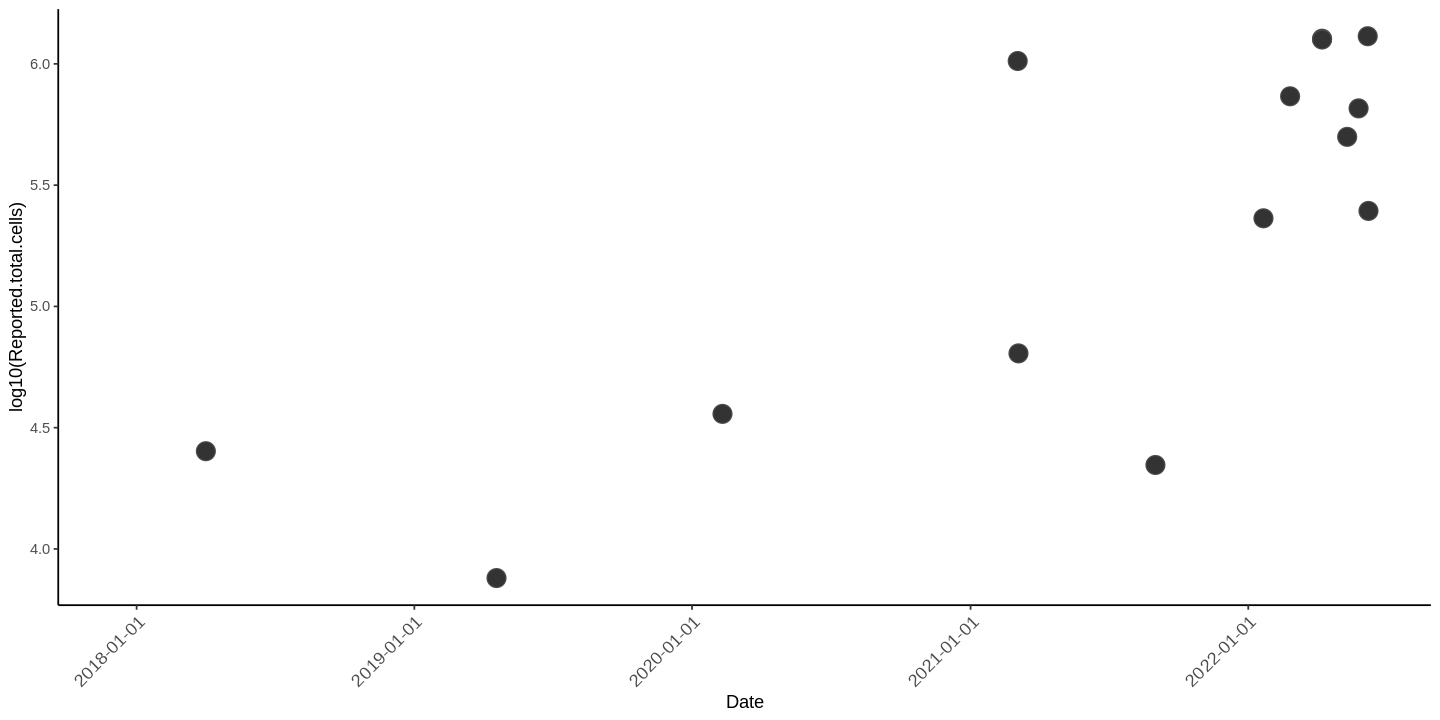

In [71]:
ggplot(df_sel, aes(x = Date, y = log10(Reported.total.cells))) + 
    geom_point(shape = 21, fill = "gray20", size = 5, col = "gray30") +
    scale_x_date(date_breaks="1 year") +
#     theme_bw() +
    theme_classic() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1, size = 11))